In [1]:
%load_ext autoreload
%autoreload 2

## loading the model

In [19]:
from gaze import init, ML
args = init(no_cuda=True, batch_size=100, verbose=0)
ml = ML(args)
path = '_Regard.pt'
ml.train(path=path)

Loading file _Regard.pt


In [20]:
ml.device

device(type='cpu')

## running the forward model on the extracted faces

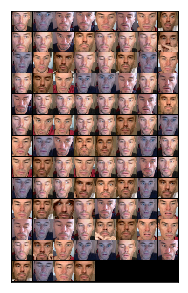

In [21]:
%matplotlib inline
fig, ax =  ml.dataset.show()

In [22]:
for batch_idx, (data, target) in enumerate(ml.dataset.train_loader):
    data, target = data.to(ml.device), target.to(ml.device)
    output = ml.model(data)

## testing the model

In [23]:
Accuracy = ml.test()
print('Accuracy={:.1f}%'.format(Accuracy*100))


Test set: Average loss: 0.2230, Accuracy: 213/222 (95%)

Accuracy=95.9%


In [24]:
data, labels = next(iter(ml.dataset.train_loader))
print(' '.join('%5s' % ml.dataset.dataset.classes[labels[j]] for j in range(ml.args.batch_size)))

 left right blink center center center center blink right center blink  left right center center right  left right center  left blink right right center  left center blink  left  left  left blink blink center right right center right center center right  left  left blink  left  left  left  left right center center right blink blink blink  left blink  left right blink center center center right blink center right center  left center  left center blink center blink right blink right  left center blink center center blink right center center blink center center blink right  left center right  left blink  left blink right blink


In [25]:
fig, ax = ml.show(only_wrong=True)

In [25]:
fig, ax = ml.show(only_wrong=False)

## cross-validation

In [9]:
args = init(verbose=0, log_interval=0, epochs=20)
from gaze import MetaML
mml = MetaML(args)
Accuracy = mml.protocol(args, 42)
print('Accuracy', Accuracy[:-1].mean(), '+/-', Accuracy[:-1].std())

Process Process-14:
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 106, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 106, in <listcomp>
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/usr/local/lib/python3.6/site-packages/torch/utils/data/dataset.py", line 103, in __getitem__
    return self.dataset[self.indices[idx]]
  File "/usr/local/lib/python3.6/site-packages/torchvision/datasets/folder.py", line 101, in __getitem__
    sample

KeyboardInterrupt: 

In [ ]:
import numpy as np
fig, ax = plt.subplots(figsize=((8, 5)))
n, bins, patches = ax.hist(Accuracy[:-1]*100, bins=np.linspace(0, 100, 100), alpha=.4)
ax.vlines(np.median(Accuracy[:-1])*100, 0, n.max(), 'g', linestyles='dashed', label='median')
ax.vlines(25, 0, n.max(), 'r', linestyles='dashed', label='chance level')
ax.vlines(100, 0, n.max(), 'k', label='max')
ax.set_xlabel('Accuracy (%)')
ax.set_ylabel('Smarts')
ax.legend(loc='best')
plt.show() 
#plt.savefig('accuracy.pdf')